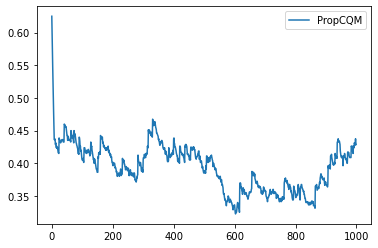

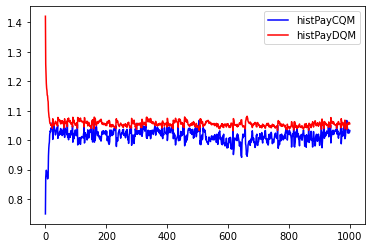

In [60]:
# The Evolution of Cooperation
## C for Cooperator, D for Defector

import random
import matplotlib.pyplot as plt 
import math

student_id = '1524' #change student id here
# --- Parameters --- #
payCC = 1.05 + 0.1*int(student_id[0])
payDC = payCC*(1.25 + 0.05*int(student_id[1]))
payDD = 1
payCD = 0

probImit = 0.04
probExprm = 0.01
initNmD = 100*(1+int(student_id[2]))
initNmC = 100*(1+int(student_id[3]))
initNmPlayers = [initNmD, initNmC]
numDays = 1000

# --- Define the game --- #
#Stage game: index 0 for defect (D), 1 for coop (C)
PAYMAT = [[payDD, payDC],[payCD, payCC]]

#Extended game
class Strategy():
    def __init__(self, act, mq_afterD=0, mq_afterC=1): #by default, if get defected -> quit, if get coop -> maintain
        self.act = act
        self.mq = [mq_afterD, mq_afterC] #Maintain current match (1) or quit (0)

strDQM = Strategy(0) #defecter's Strategy
strCQM = Strategy(1) #cooperator's Strategy
listStrategies = [strDQM, strCQM] #Feasible strategies set

#Random matching algorithm
def match():
    listUnmatched = [agent for agent in listAllAgents if agent.opponent is None]
    random.shuffle(listUnmatched)
    for i in range(math.floor(len(listUnmatched)/2)): #matching by indices after shuffle
        listUnmatched[2*i].opponent = listUnmatched[2*i+1] #match: player0 taking player1 as his opp
        listUnmatched[2*i+1].opponent = listUnmatched[2*i] #match: player1 taking player0 as his opp

#Calculate the average payoff
def update_state():
    tempDict = { strategy:[0,0] for strategy in listStrategies } #key: strategy, values:[no. of agents, cummulative payoffs]
    for agent in listAllAgents:
        strategy = agent.strategy
        tempDict[strategy][0] +=1 #Update number of agent using the strategy
        tempDict[strategy][1] += agent.payoff #Update the cumm. payoffs
    shareDict = { strategy: tempDict[strategy][0]/len(listAllAgents) for strategy in listStrategies } #no of players/ all players
    avePayDict = { strategy: tempDict[strategy][1]/tempDict[strategy][0] for strategy in listStrategies } #cum payoffs/num. of players
    bestStr = max(avePayDict, key=lambda strategy: avePayDict[strategy]) #pick the str. that maximizes average payoff
    bestPay = avePayDict[bestStr]
    return shareDict, bestStr, avePayDict

# --- Define Agent's class --- #
class Agent():
    #Constructor
    def __init__(self, strategy=listStrategies[0]): #defector by default
        self.opponent = None #opponent in the current match, None when unmatched 
        self.strategy = strategy #current strategy, chosen from listStrategies
        self.payoff = 0
    #Play the game with current opp
    def play(self):
        if self.opponent is None:
            self.payoff = 0
        else:
            ownAct = self.strategy.act
            oppAct = self.opponent.strategy.act
            self.payoff = PAYMAT[ownAct][oppAct]
            if self.strategy.mq[oppAct] == 0 or self.opponent.strategy.mq[ownAct] == 0:
                self.opponent = None
    #Update strategy
    def update_strategy(self):
        if random.uniform(0,1) < probExprm:
            self.strategy = random.choice(listStrategies)
        elif random.uniform(0,1) < probImit:
            if avePayDict[bestStr] > self.payoff:
                self.strategy = bestStr

# --- Initial State --- #
listAllAgents = [ Agent(listStrategies[k]) for k in range(len(listStrategies)) for i in range(initNmPlayers[k]) ]
histPropCQM = []
histPayCQM = []
histPayDQM = []

# --- Simulation --- #
for day in range(numDays):
    match()
    for agent in listAllAgents:
        agent.play()
    shareDict, bestStr, avePayDict = update_state()
    histPropCQM.append(shareDict[strCQM])
    histPayCQM.append(avePayDict[strCQM])
    histPayDQM.append(avePayDict[strDQM])
    for agent in listAllAgents:
        agent.update_strategy()

# --- Plot --- #
plt.plot(histPropCQM, label='PropCQM')
plt.legend()
plt.figure()

plt.plot(histPayCQM, color='b', label='histPayCQM')
plt.plot(histPayDQM, color='r', label='histPayDQM')
plt.legend()
plt.show()


In [61]:
print(PAYMAT, initNmPlayers)

[[1, 1.725], [0, 1.1500000000000001]] [300, 500]
